# Term Project - CS329E
#### University Of Texas at Austin
#### 30 November 2021 
###### Contributors: Keigan Kincaid  and Joshua Yoh 

# Are young inexperienced pilots more likely to cause from fatal or severe injury in fixed wing general aviation aircraft incidents as oppsed to there older more experienced counter parts?

#### What is our dataset about?

The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories, and possessions, and in international waters. 

A preliminary report is available online within a few days of an accident. Information is added when available, and when the investigation is completed, the preliminary report is replaced with a final description of the accident and its probable cause. The dataset is updated monthly in Microsoft Access 2000 MDB format. 

For this project we decided to use a version of the dataset only including incidents from 2008 to the Present. Our decision for this was largely because the datasets before 2008 did not distinguish whether the event represented the pilot controlling the aircraft at the time or whether the event index was associate with co-pilots, crew, or passengers’ injuries or related statistics.

To appropriately address our research question and reduce our sample size from over 100,000 events to around 8000. The dataset was originally cleaned via Excel in the Microsoft Access 2000 MDB format. From there we selected the appropriate variables and compiled them into a single Excel file where we were able to remove repeats, and null values. Finally, we saved this subset of the original Microsoft Access Database in a CSV format.


#### Information Regarding Data Cleaning

As our dataset was around 8000 observations, we utilized a sample of 2000 observations. Then split this sample into an 80 / 20 split to test and train our classifiers.

#### Research question, What we hope to learn from data, and Learning model Implemented

Research Question: Are young inexperienced pilots more likely to cause from fatal or severe injury in fixed wing general aviation aircraft incidents as oppsed to there older more experienced counter parts?

In the study we hope to create a model that can classify injury level based upon pilot age, measured in years of age, and experienced, measured in hours actively piloting an aircraft.

It is important to note that flight hours are measured by the number of hours a plane has been operating an aircraft, which is kept in a log and verified in annual inspections by a third party in part to ensure the airworthiness of the vehicle, as well as its pilot. Further hours may be logged while completing training exercises as a co-pilot or with guided instruction for a CFI (Certified Flight Instructor.) 

Time logged in simulators or ground school are not included in pilot flight hours. In this study we are looking to use an industry standard classifier called an SVM to help predict pilot crash severity. The three classifiers we will be using are SVM using Sci-kit Learn, SVM SVC Linear Regression, and a Gradient Descent and Hinge Loss function without using libraries.

#### Exception Regarding Results Prior to Study

Generally, we expect that younger pilots with less hours will be more reckless than those with more experience and more time in the cockpit. This inexperience is a key factor in why we believe these pilots will be responsible for a larger portion of fixed wing aviation incidents.

#### How we would like our project to be evaluated, How to assess correctness of our models, Thoughts on our models success prior to study

It is important to consider that we are only using two features to classify these events. That being Flight Hours and Age. There are many more features that play a part in aviation incidents which could be considered more direct correlations and indications of aviation incidents.

We expect the model to do better than random chance, that is 51% or better. I do not expect there to be a large difference in the implementations, however I do believe the data is not perfect so for future research it would be important to compare models that have the highest probability of predicting outcomes as well as including more features that will improve odds of correctness without blatantly representing outcomes such as engine failure, severe weather conditions, or drug / alcohol use.

#### Results

#### What can you do to improve your results? What are limitations of your implementations or dataset?

#### Ideas Applied to improve results:

#### Describe Code and Implementations:

#### References

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [2]:
# loading in our crash data then shuffle the dataset so that it is difference each time we run the code
crash_df_raw = pd.read_csv('crash_Dataset.csv')

# Optional shuffle feature for testing
# crash_df_raw = shuffle(crash_df_raw)

In [3]:
# taking the first 2000 observations from the shuffled dataset
crash_df = crash_df_raw.head(n=2000)
crash_df

,ev_id,crew_age,crew_inj_level,flight_hours
0,20080514X00667,54,0,14500.0
1,20080312X00305,42,0,10000.0
2,20080827X01333,56,3,1200.0
3,20090526X53909,61,1,367.0
4,20090718X25941,65,0,1.0
...,...,...,...,...
1995,20140807X41115,44,0,1.0
1996,20140807X52333,59,0,10.0
1997,20140807X65826,47,1,0.0
1998,20140807X92309,70,2,9.0


In [4]:
# splitting into features and targets, X and Y respectively
X = crash_df[['crew_age', 'flight_hours']]
Y = crash_df['crew_inj_level']

# splitting the data into testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, random_state=512)

# re-indexing in dataframe
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
# X_train = X_train.reset_index(inplace=True)
# Y_train = Y_train.reset_index(inplace=True)


# Printing shapes of Target training and test data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(200, 2)
(200,)
(1800, 2)
(1800,)


## Function Predict SVM for Comparing Accuracy of Classifiers

In [5]:
def predict_svm(weights, X):
    """
    Predict the class between 0 and 1 using learned SVM parameters weights.
    """    
    return np.where(np.dot(X, weights)<0, -1, 1)

## Implementation of SVM using Libraries

In [6]:
model = svm.SVC(C=.001)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [7]:
print("Accuracy Score:", accuracy_score(Y_test, y_pred), "\n")

print(classification_report(Y_test, y_pred))

Accuracy Score: 0.5027777777777778 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       905
           1       0.00      0.00      0.00       256
           2       0.00      0.00      0.00       201
           3       0.00      0.00      0.00       438

    accuracy                           0.50      1800
   macro avg       0.13      0.25      0.17      1800
weighted avg       0.25      0.50      0.34      1800



/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Implementation of Linear SVC using Libraries

In [8]:
model = svm.LinearSVC(C=.01, max_iter=300, fit_intercept=False)
model.fit(X_train, Y_train)

print(dir(model))

print(model.coef_)
print(model.fit_intercept)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(Y_test, y_pred))

# from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

['C', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'penalty', 'predict', 'random_state', 'score', 'set_params', 'sparsify', 'tol', 'verbose']
[[ 0.00348061 -0.00360246]
 [-0.01225379 -0.00154838]
 [-0.01442892 -0.00075408]
 [-0.00984284 -0.00049537]]
False
Accuracy Score: 

/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: Undefi

## Implementation of SVM without Libraries

In [9]:
def compute_cost(X, y, W, regularization_factor):
    '''This function calculate the hinge loss. Primal Problem in SVM'''
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
    
    # This is our max(0, distance). 
    distances[distances < 0] = 0 
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    # This divide by 2 is not important. You can skip doing it 
    # because we want only to check if this cost is going down or not. 
    return (1 / 2 * np.dot(W, W) + hinge_loss)

In [10]:
def calculate_gradient(X, y, W, regularization_factor):
      
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])
        
    distance = 1 - (y * np.dot(X, W))
    
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        
        if (d < 0):
            di = W
        else:
            di = W - (regularization_factor * y[ind] * X.loc[ind])
            
            
        dw += di
    
    dw = dw/len(y)  # average
    
    return dw

In [11]:
# adding column of ones for matrix multiplication (dot product)
# x_0 = [1]*len(X_train)
# X_train['x_0'] = x_0
# X_train = X_train[['x_0', 'crew_age', 'flight_hours']]
# x_01 = [1]*len(X_test)

# X_test['x_0'] = x_01
# X_test = X_test[['x_0', 'crew_age', 'flight_hours']]
# x_0 = [1]*len(X_train)
# X_train['x_0'] = x_0

# x_0 = [1]*len(X_train)
# X_train['x_0'] = x_0
# X_train = X_train[['x_0', 'crew_age', 'flight_hours']]

# x_01 = [1]*len(X_test)
# X_test['x_0'] = x_01
# X_test = X_test[['x_0', 'crew_age', 'flight_hours']]

In [12]:
# same length as previous matrices
# y intercept is the b, must have one additional and add to x coloumn of 1s
# logistic reg and support vector having 1 additional 
# ex 16 or 16 1
weights = np.zeros(2)

# Now we optimize it using Gradient Descent. 
num_iterations = 256
learning_rate = 0.0001
regularization = 0.001

cost_list = []

for i in range(0, num_iterations):
    
    # current iteration cost
    cost = compute_cost(X_train, Y_train, weights, regularization)
    
    print("Epoch", i, "Cost is:", cost, "\n", "Weights:\n", weights, "\n")
    
    # appending current iteration cost
    cost_list.append(cost)
    
    # gradient descent (optimization)
    grad = calculate_gradient(X_train, Y_train, weights, regularization)
    
    
    # updating the weights
    weights = weights - learning_rate * grad

Epoch 0 Cost is: 0.001 
 Weights:
 [0. 0.] 

Epoch 1 Cost is: 0.0008358782300411711 
 Weights:
 crew_age        0.000006
flight_hours    0.000284
Name: 0, dtype: float64 

Epoch 2 Cost is: 0.0008320884647119122 
 Weights:
 crew_age        0.000011
flight_hours    0.000303
Name: 0, dtype: float64 

Epoch 3 Cost is: 0.0008282994572978217 
 Weights:
 crew_age        0.000015
flight_hours    0.000322
Name: 0, dtype: float64 

Epoch 4 Cost is: 0.0008245112076473236 
 Weights:
 crew_age        0.000020
flight_hours    0.000341
Name: 0, dtype: float64 

Epoch 5 Cost is: 0.0008209182800742313 
 Weights:
 crew_age        0.000024
flight_hours    0.000360
Name: 0, dtype: float64 

Epoch 6 Cost is: 0.0008181313579114233 
 Weights:
 crew_age        0.000028
flight_hours    0.000376
Name: 0, dtype: float64 

Epoch 7 Cost is: 0.0008155806529674787 
 Weights:
 crew_age        0.000033
flight_hours    0.000392
Name: 0, dtype: float64 

Epoch 8 Cost is: 0.0008136590407615959 
 Weights:
 crew_age       

Epoch 67 Cost is: 0.0007737932299405813 
 Weights:
 crew_age        0.000258
flight_hours    0.000823
Name: 0, dtype: float64 

Epoch 68 Cost is: 0.0007734714189967739 
 Weights:
 crew_age        0.000262
flight_hours    0.000828
Name: 0, dtype: float64 

Epoch 69 Cost is: 0.0007731496724119372 
 Weights:
 crew_age        0.000265
flight_hours    0.000832
Name: 0, dtype: float64 

Epoch 70 Cost is: 0.0007728279901732002 
 Weights:
 crew_age        0.000269
flight_hours    0.000837
Name: 0, dtype: float64 

Epoch 71 Cost is: 0.000772506372267694 
 Weights:
 crew_age        0.000272
flight_hours    0.000841
Name: 0, dtype: float64 

Epoch 72 Cost is: 0.0007721848186825527 
 Weights:
 crew_age        0.000276
flight_hours    0.000846
Name: 0, dtype: float64 

Epoch 73 Cost is: 0.0007718633294049129 
 Weights:
 crew_age        0.000279
flight_hours    0.000850
Name: 0, dtype: float64 

Epoch 74 Cost is: 0.0007715419044219137 
 Weights:
 crew_age        0.000283
flight_hours    0.000855
Nam

Epoch 134 Cost is: 0.0007559322927806421 
 Weights:
 crew_age        0.000488
flight_hours    0.001079
Name: 0, dtype: float64 

Epoch 135 Cost is: 0.0007557595122868954 
 Weights:
 crew_age        0.000491
flight_hours    0.001081
Name: 0, dtype: float64 

Epoch 136 Cost is: 0.0007555867663475196 
 Weights:
 crew_age        0.000495
flight_hours    0.001084
Name: 0, dtype: float64 

Epoch 137 Cost is: 0.0007554140549556043 
 Weights:
 crew_age        0.000498
flight_hours    0.001086
Name: 0, dtype: float64 

Epoch 138 Cost is: 0.0007552413781042402 
 Weights:
 crew_age        0.000501
flight_hours    0.001089
Name: 0, dtype: float64 

Epoch 139 Cost is: 0.0007550687357865195 
 Weights:
 crew_age        0.000505
flight_hours    0.001091
Name: 0, dtype: float64 

Epoch 140 Cost is: 0.0007548961279955361 
 Weights:
 crew_age        0.000508
flight_hours    0.001094
Name: 0, dtype: float64 

Epoch 141 Cost is: 0.0007547235547243847 
 Weights:
 crew_age        0.000511
flight_hours    0.0

Epoch 198 Cost is: 0.0007450815717362421 
 Weights:
 crew_age        0.000698
flight_hours    0.001238
Name: 0, dtype: float64 

Epoch 199 Cost is: 0.0007449330430397449 
 Weights:
 crew_age        0.000701
flight_hours    0.001240
Name: 0, dtype: float64 

Epoch 200 Cost is: 0.0007447845440475017 
 Weights:
 crew_age        0.000705
flight_hours    0.001242
Name: 0, dtype: float64 

Epoch 201 Cost is: 0.000744636074753572 
 Weights:
 crew_age        0.000708
flight_hours    0.001244
Name: 0, dtype: float64 

Epoch 202 Cost is: 0.0007444876351520162 
 Weights:
 crew_age        0.000711
flight_hours    0.001246
Name: 0, dtype: float64 

Epoch 203 Cost is: 0.0007443392252368966 
 Weights:
 crew_age        0.000714
flight_hours    0.001249
Name: 0, dtype: float64 

Epoch 204 Cost is: 0.000744190845002276 
 Weights:
 crew_age        0.000717
flight_hours    0.001251
Name: 0, dtype: float64 

Epoch 205 Cost is: 0.0007440424944422183 
 Weights:
 crew_age        0.000721
flight_hours    0.001

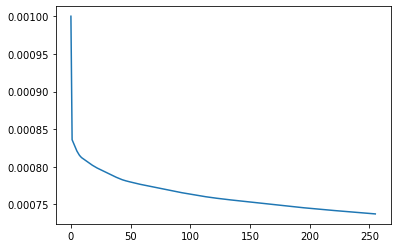

In [13]:
# plot cost per iteration
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [14]:
from sklearn.svm import SVC
svm_clf = SVC(gamma = "auto")
svm_clf.fit(X_train, Y_train)
y_pred = svm_clf.predict(X_test)

print("Accuracy Score:", accuracy_score(Y_test, y_pred))
print("Accuracy Score:", accuracy_score(Y_test, predict_svm(weights, X_test)))

print(classification_report(Y_test, predict_svm(weights, X_test)))

Accuracy Score: 0.48333333333333334
Accuracy Score: 0.14222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       905
           1       0.14      1.00      0.25       256
           2       0.00      0.00      0.00       201
           3       0.00      0.00      0.00       438

    accuracy                           0.14      1800
   macro avg       0.04      0.25      0.06      1800
weighted avg       0.02      0.14      0.04      1800



/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
